In [ ]:
import pandas as pd
import re
from bs4 import BeautifulSoup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('train.csv')

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
new_df=df.sample(100000,random_state=4)
new_df

,id,qid1,qid2,question1,question2,is_duplicate
198127,198127,570,140055,Where can I buy best quality customized cupcak...,"Where can I buy delicious, fresh & hand made c...",1
338078,338078,361056,465606,How can you determine the valency of hydrogen?,How is valency of phosphorus determined?,0
246894,246894,344397,360022,How can I inspire you?,How can I inspire myself?,0
79011,79011,134619,1121,What are the must places to visit in Kerala (6...,What are the best places to visit in Kerala fo...,1
150179,150179,236419,236420,How do you qualify for gastric bypass surgery?,What are the positive and negative side effect...,0
...,...,...,...,...,...,...
9578,9578,18603,18604,Should I accept my parents choice for marriage...,Should I marry with my parents choice or my ch...,0
228523,228523,337608,337609,Are there any wholesale markets in India (exce...,Can I wear a plain white kurta pajama for coll...,0
401081,401081,534465,534466,Who were all of the US Presidents during the C...,What were some symbols of the Cold War?,0
342025,342025,469949,469950,California Senate Bill 234 (2011): Will digita...,How much is 15% tax of gym?,0


In [ ]:
def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()

    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q


In [ ]:
preprocess("I 've already taken @ # could've </b>")

'i  have already taken at   could have'

In [ ]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

<ipython-input-7-d7458753c764>:161: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [ ]:
# prompt: apply lemattization on the question 1 question 2 and make new coluns

import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
  return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

new_df['question1_lemmatized'] = new_df['question1'].apply(lemmatize_words)
new_df['question2_lemmatized'] = new_df['question2'].apply(lemmatize_words)



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,question1_lemmatized,question2_lemmatized
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made cup ...
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,how can you determine the valency of hydrogen,how is valency of phosphorus determined
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,how can i inspire you,how can i inspire myself
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,what are the must place to visit in kerala 6 7...,what are the best place to visit in kerala for...
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...
...,...,...,...,...,...,...,...,...
9578,9578,18603,18604,should i accept my parents choice for marriage...,should i marry with my parents choice or my ch...,0,should i accept my parent choice for marriage ...,should i marry with my parent choice or my choice
228523,228523,337608,337609,are there any wholesale markets in india exce...,can i wear a plain white kurta pajama for coll...,0,are there any wholesale market in india except...,can i wear a plain white kurta pajama for coll...
401081,401081,534465,534466,who were all of the us presidents during the c...,what were some symbols of the cold war,0,who were all of the u president during the col...,what were some symbol of the cold war
342025,342025,469949,469950,california senate bill 234 2011 will digita...,how much is 15 percent tax of gym,0,california senate bill 234 2011 will digital g...,how much is 15 percent tax of gym


In [ ]:
new_df['q1_len']=new_df['question1_lemmatized'].str.len()
new_df['q2_len']=new_df['question2_lemmatized'].str.len()

In [ ]:
new_df['q1_num_words']=new_df['question1_lemmatized'].apply(lambda row:len(row.split(" ")))
new_df['q2_num_words']=new_df['question2_lemmatized'].apply(lambda row:len(row.split(" ")))

In [ ]:
def common_words(row):
    w1=set(map(lambda word:word.lower().strip(),row['question1_lemmatized'].split(" ")))
    w2=set(map(lambda word:word.lower().strip(),row['question2_lemmatized'].split(" ")))
    return len(w1&w2)

In [ ]:
new_df['word_common']=new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_lemmatized,question2_lemmatized,q1_len,q2_len,q1_num_words,q2_num_words,word_common
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made cup ...,61,72,11,14,6
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,how can you determine the valency of hydrogen,how is valency of phosphorus determined,45,39,8,6,3
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,how can i inspire you,how can i inspire myself,21,24,5,5,4
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,what are the must place to visit in kerala 6 7...,what are the best place to visit in kerala for...,50,62,12,12,8
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,45,89,8,16,3


In [ ]:
def total_words(row):
  w1=set(map(lambda word:word.lower().strip(),row['question1_lemmatized'].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row['question2_lemmatized'].split(" ")))
  return (len(w1)+len(w2))

In [ ]:
new_df["word_total"]=new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_lemmatized,question2_lemmatized,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made cup ...,61,72,11,14,6,25
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,how can you determine the valency of hydrogen,how is valency of phosphorus determined,45,39,8,6,3,14
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,how can i inspire you,how can i inspire myself,21,24,5,5,4,10
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,what are the must place to visit in kerala 6 7...,what are the best place to visit in kerala for...,50,62,12,12,8,24
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,45,89,8,16,3,24


In [ ]:
new_df['word_share']=round(new_df['word_common']/new_df['word_total'],2)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,question1_lemmatized,question2_lemmatized,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made cup ...,61,72,11,14,6,25,0.24
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,how can you determine the valency of hydrogen,how is valency of phosphorus determined,45,39,8,6,3,14,0.21
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,how can i inspire you,how can i inspire myself,21,24,5,5,4,10,0.40
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,what are the must place to visit in kerala 6 7...,what are the best place to visit in kerala for...,50,62,12,12,8,24,0.33
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,45,89,8,16,3,24,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,9578,18603,18604,should i accept my parents choice for marriage...,should i marry with my parents choice or my ch...,0,should i accept my parent choice for marriage ...,should i marry with my parent choice or my choice,74,49,14,10,6,19,0.32
228523,228523,337608,337609,are there any wholesale markets in india exce...,can i wear a plain white kurta pajama for coll...,0,are there any wholesale market in india except...,can i wear a plain white kurta pajama for coll...,91,78,18,15,4,32,0.12
401081,401081,534465,534466,who were all of the us presidents during the c...,what were some symbols of the cold war,0,who were all of the u president during the col...,what were some symbol of the cold war,101,37,22,8,5,24,0.21
342025,342025,469949,469950,california senate bill 234 2011 will digita...,how much is 15 percent tax of gym,0,california senate bill 234 2011 will digital g...,how much is 15 percent tax of gym,77,33,13,8,1,21,0.05


In [ ]:
from nltk.corpus import stopwords
def fetch_token_features(row):
  q1=row['question1_lemmatized']
  q2=row['question2_lemmatized']
  SAFE_DIV=0.0001
  stop_words=stopwords.words("english")
  token_features=[0.0]*8
  # Converting the sentences into tokens
  q1_tokens=q1.split()
  q2_tokens=q2.split()

  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return token_features
  # Number of stop words in the first sentence
  q1_words=set([word for word in q1_tokens if word not in stop_words ])
  q2_words=set([word for word in q2_tokens if word not in stop_words])

  q1_stops=set([word for word in q1_tokens if word in stop_words])
  q2_stops=set([word for word in q2_tokens if word in stop_words])

  common_word_count=len(q1_words.intersection(q2_words))
  common_stop_count=len(q1_stops.intersection(q2_stops))
  common_token_count=len(set(q1_tokens).intersection(set(q2_tokens)))

  token_features[0]=common_word_count/(min(len(q1_words),len(q2_words))+SAFE_DIV)
  token_features[1]=common_word_count/(max(len(q1_words),len(q2_words))+SAFE_DIV)
  token_features[2]=common_stop_count/(min(len(q1_stops),len(q2_stops))+SAFE_DIV)
  token_features[3]=common_stop_count/(max(len(q1_stops),len(q2_stops))+SAFE_DIV)
  token_features[4]=common_token_count/(min(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
  token_features[5]=common_token_count/(max(len(q1_tokens),len(q2_tokens))+SAFE_DIV)
  token_features[6]=int(q1_tokens[-1]==q2_tokens[-1])
  token_features[7]=int(q1_tokens[0]==q2_tokens[0])
  return token_features






In [ ]:
import nltk
nltk.download('stopwords')
token_features=new_df.apply(fetch_token_features,axis=1)
new_df["cwc_min"]=list(map(lambda x:x[0],token_features))
new_df["cwc_max"]=list(map(lambda x:x[1],token_features))
new_df["csc_min"]=list(map(lambda x:x[0],token_features))
new_df["csc_max"]=list(map(lambda x:x[1],token_features))
new_df["ctc_min"]=list(map(lambda x:x[0],token_features))
new_df["ctc_max"]=list(map(lambda x:x[1],token_features))
new_df["last_word_eq"]=list(map(lambda x:x[0],token_features))
new_df["first_word_eq"]=list(map(lambda x:x[0],token_features))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install Distance
import distance

def fetch_length_features(row):
  q1=row['question1_lemmatized']
  q2=row['question2_lemmatized']
  length_features=[0.0]*3
  q1_tokens=q1.split()
  q2_tokens=q2.split()
  if len(q1_tokens)==0 or len(q2_tokens)==0:
    return length_features
  length_features[0]=abs(len(q1_tokens)-len(q2_tokens))
  length_features[1]=(len(q1_tokens)+len(q2_tokens))/2
  length_features[2]=distance.levenshtein(q1,q2)
  return length_features

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16257 sha256=5df74d5908d431d5053a8dd6094237eaf72e563e432004780c0865d79b1710d0
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built Distance


In [ ]:
length_features=new_df.apply(fetch_length_features,axis=1)
new_df['abs_len_diff']=list(map(lambda x:x[0],length_features))
new_df['mean_len']=list(map(lambda x:x[1],length_features))
new_df['longest_substr_ratio']=list(map(lambda x:x[2],length_features))

In [ ]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,question1_lemmatized,question2_lemmatized,q1_len,q2_len,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made cup ...,61,72,...,0.299997,0.428565,0.299997,0.428565,0.299997,0.428565,0.428565,3.0,12.5,32.0
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,how can you determine the valency of hydrogen,how is valency of phosphorus determined,45,39,...,0.333322,0.333322,0.333322,0.333322,0.333322,0.333322,0.333322,2.0,7.0,35.0
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,how can i inspire you,how can i inspire myself,21,24,...,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.999900,0.0,5.0,5.0
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,what are the must place to visit in kerala 6 7...,what are the best place to visit in kerala for...,50,62,...,0.428565,0.499992,0.428565,0.499992,0.428565,0.499992,0.499992,0.0,12.0,18.0
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,45,89,...,0.333330,0.749981,0.333330,0.749981,0.333330,0.749981,0.749981,8.0,12.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,9578,18603,18604,should i accept my parents choice for marriage...,should i marry with my parents choice or my ch...,0,should i accept my parent choice for marriage ...,should i marry with my parent choice or my choice,74,49,...,0.399992,0.666644,0.399992,0.666644,0.399992,0.666644,0.666644,4.0,12.0,41.0
228523,228523,337608,337609,are there any wholesale markets in india exce...,can i wear a plain white kurta pajama for coll...,0,are there any wholesale market in india except...,can i wear a plain white kurta pajama for coll...,91,78,...,0.249998,0.333330,0.249998,0.333330,0.249998,0.333330,0.333330,3.0,16.5,69.0
401081,401081,534465,534466,who were all of the us presidents during the c...,what were some symbols of the cold war,0,who were all of the u president during the col...,what were some symbol of the cold war,101,37,...,0.333328,0.666644,0.333328,0.666644,0.333328,0.666644,0.666644,14.0,15.0,74.0
342025,342025,469949,469950,california senate bill 234 2011 will digita...,how much is 15 percent tax of gym,0,california senate bill 234 2011 will digital g...,how much is 15 percent tax of gym,77,33,...,0.099999,0.199996,0.099999,0.199996,0.099999,0.199996,0.199996,5.0,10.5,61.0


In [ ]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
def fetch_fuzzy_features(row):
    q1=row['question1_lemmatized']
    q2=row['question2_lemmatized']
    fuzzy_features=[0.0]*4
    fuzzy_features[0]=fuzz.QRatio(q1,q2)
    fuzzy_features[1]=fuzz.partial_ratio(q1,q2)
    fuzzy_features[2]=fuzz.token_sort_ratio(q1,q2)
    fuzzy_features[3]=fuzz.token_set_ratio(q1,q2)

    return fuzzy_features

In [ ]:
fuzzy_features=new_df.apply(fetch_fuzzy_features,axis=1)
new_df['fuzz_ratio']=list(map(lambda x:x[0],fuzzy_features))
new_df['fuzz_partial_ratio']=list(map(lambda x:x[1],fuzzy_features))
new_df['token_sort_ratio']=list(map(lambda x:x[2],fuzzy_features))
new_df['token_set_ratio']=list(map(lambda x:x[3],fuzzy_features))


In [ ]:
print(new_df.shape)

(100000, 30)


In [ ]:
  new_df.to_csv("final_features.csv")

In [ ]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,question1_lemmatized,question2_lemmatized,q1_len,q2_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
198127,198127,570,140055,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made c...,1,where can i buy best quality customized cupcak...,where can i buy delicious fresh hand made cup ...,61,72,...,0.299997,0.428565,0.428565,3.0,12.5,32.0,65,56,59,63
338078,338078,361056,465606,how can you determine the valency of hydrogen,how is valency of phosphorus determined,0,how can you determine the valency of hydrogen,how is valency of phosphorus determined,45,39,...,0.333322,0.333322,0.333322,2.0,7.0,35.0,50,54,64,67
246894,246894,344397,360022,how can i inspire you,how can i inspire myself,0,how can i inspire you,how can i inspire myself,21,24,...,0.999900,0.999900,0.999900,0.0,5.0,5.0,84,90,84,89
79011,79011,134619,1121,what are the must places to visit in kerala 6...,what are the best places to visit in kerala fo...,1,what are the must place to visit in kerala 6 7...,what are the best place to visit in kerala for...,50,62,...,0.428565,0.499992,0.499992,0.0,12.0,18.0,79,84,68,85
150179,150179,236419,236420,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,0,how do you qualify for gastric bypass surgery,what are the positive and negative side effect...,45,89,...,0.333330,0.749981,0.749981,8.0,12.0,56.0,46,58,48,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9578,9578,18603,18604,should i accept my parents choice for marriage...,should i marry with my parents choice or my ch...,0,should i accept my parent choice for marriage ...,should i marry with my parent choice or my choice,74,49,...,0.399992,0.666644,0.666644,4.0,12.0,41.0,60,71,67,84
228523,228523,337608,337609,are there any wholesale markets in india exce...,can i wear a plain white kurta pajama for coll...,0,are there any wholesale market in india except...,can i wear a plain white kurta pajama for coll...,91,78,...,0.249998,0.333330,0.333330,3.0,16.5,69.0,28,40,47,54
401081,401081,534465,534466,who were all of the us presidents during the c...,what were some symbols of the cold war,0,who were all of the u president during the col...,what were some symbol of the cold war,101,37,...,0.333328,0.666644,0.666644,14.0,15.0,74.0,36,54,39,70
342025,342025,469949,469950,california senate bill 234 2011 will digita...,how much is 15 percent tax of gym,0,california senate bill 234 2011 will digital g...,how much is 15 percent tax of gym,77,33,...,0.099999,0.199996,0.199996,5.0,10.5,61.0,25,33,29,29


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


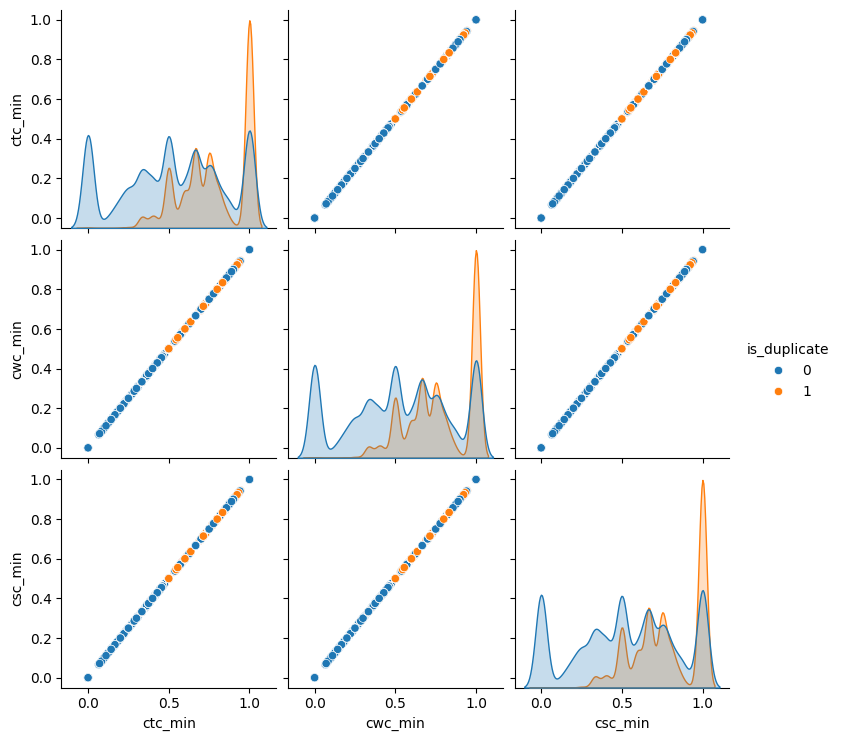

In [ ]:
sns.pairplot(new_df[['ctc_min','cwc_min','csc_min','is_duplicate']],hue='is_duplicate')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


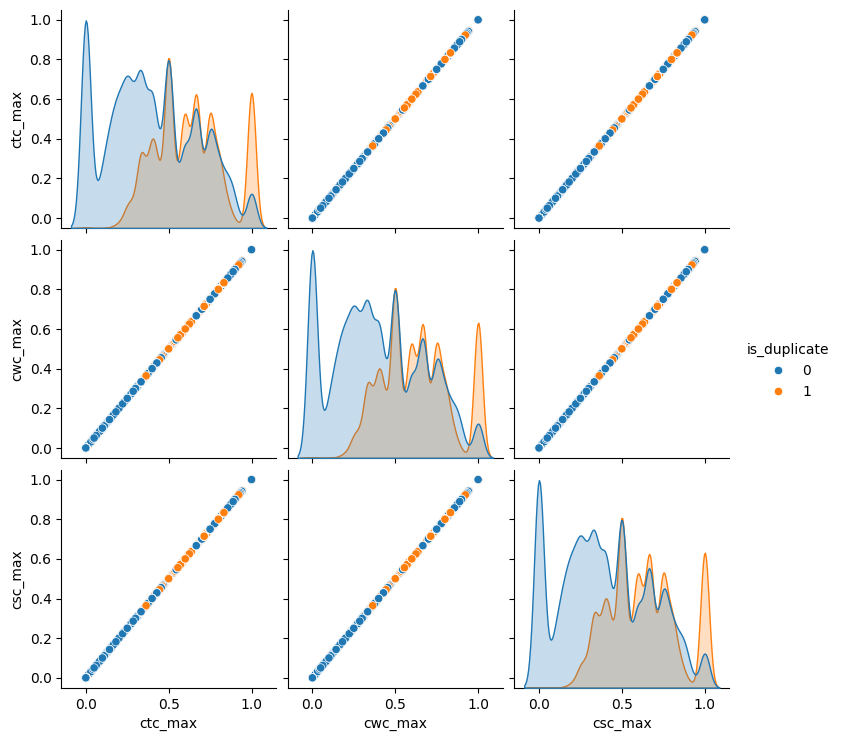

In [ ]:
sns.pairplot(new_df[['ctc_max','cwc_max','csc_max','is_duplicate']],hue='is_duplicate')


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


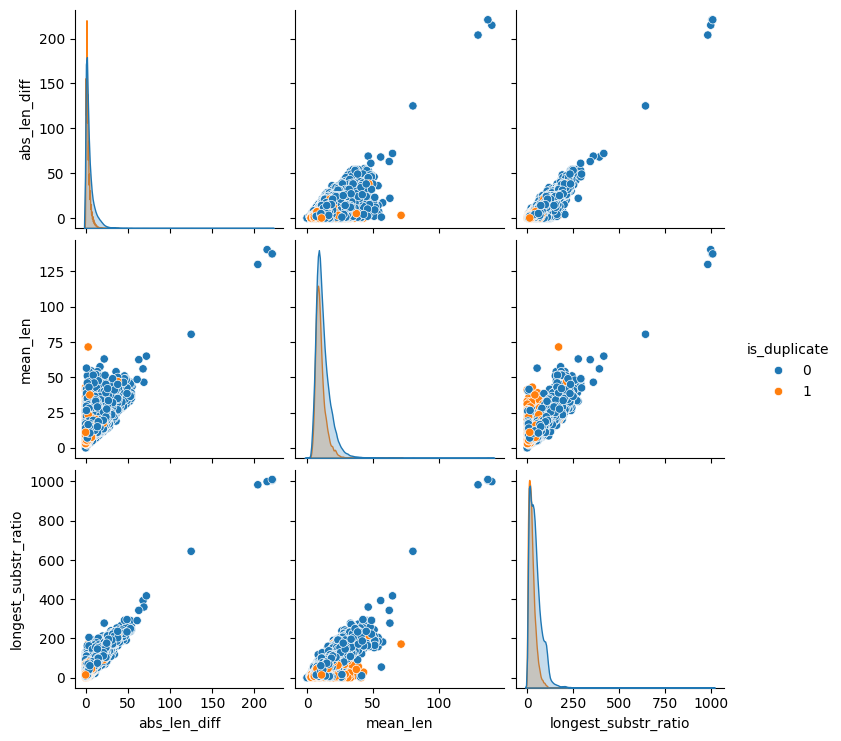

In [ ]:
sns.pairplot(new_df[['abs_len_diff','mean_len','longest_substr_ratio','is_duplicate']],hue='is_duplicate')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

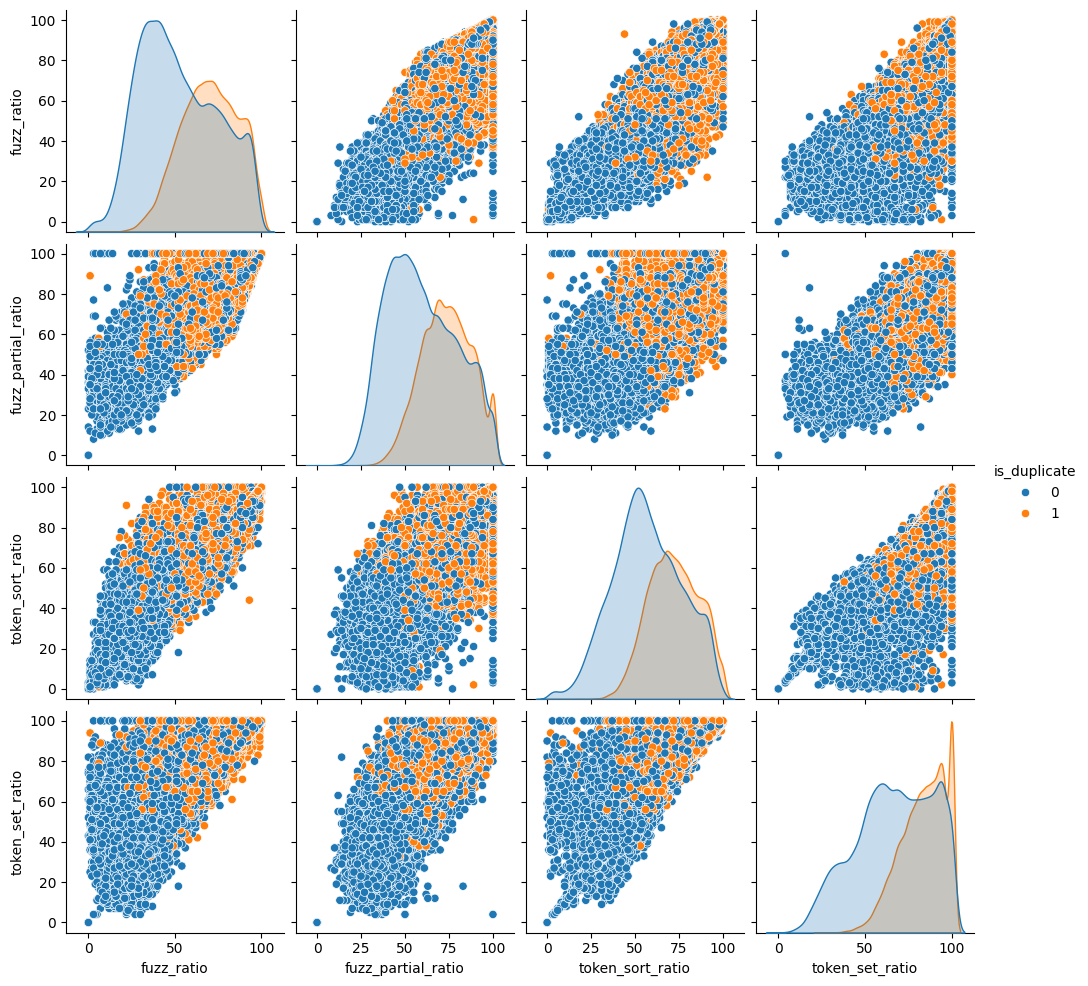

In [ ]:
sns.pairplot(new_df[['fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

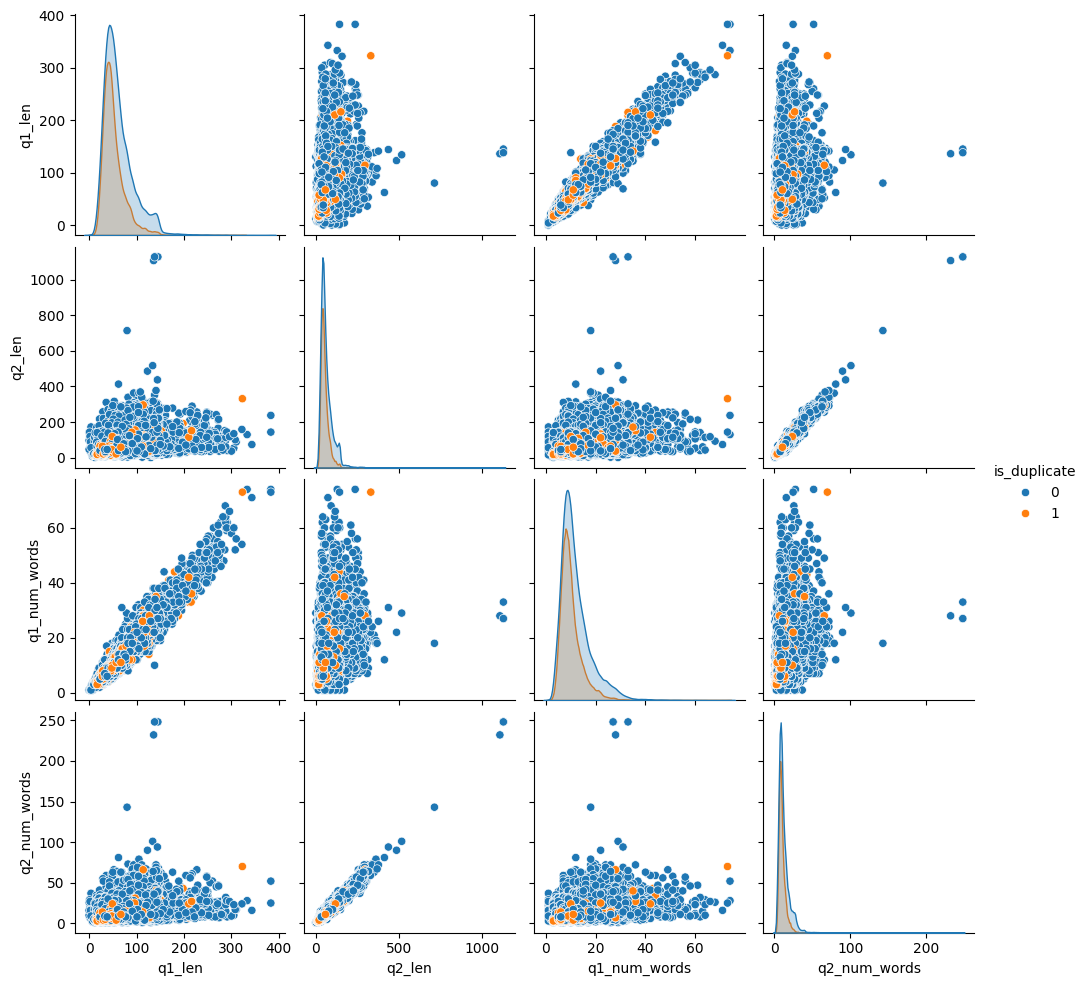

In [ ]:
sns.pairplot(new_df[['q1_len','q2_len','q1_num_words','q2_num_words','is_duplicate']],hue='is_duplicate')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X=MinMaxScaler().fit_transform(new_df[['q1_len', 'q2_len',
       'q1_num_words', 'q2_num_words', 'word_common', 'word_total',
       'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio']])
y=new_df['is_duplicate'].values

In [ ]:
new_df.columns

Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'question1_lemmatized', 'question2_lemmatized', 'q1_len', 'q2_len',
       'q1_num_words', 'q2_num_words', 'word_common', 'word_total',
       'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
       'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
       'token_sort_ratio', 'token_set_ratio'],
      dtype='object')

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
tsne2d=TSNE(n_components=2,init='random',random_state=101,method='barnes_hut',n_iter=1000,verbose=2).fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.006s...


KeyboardInterrupt: 

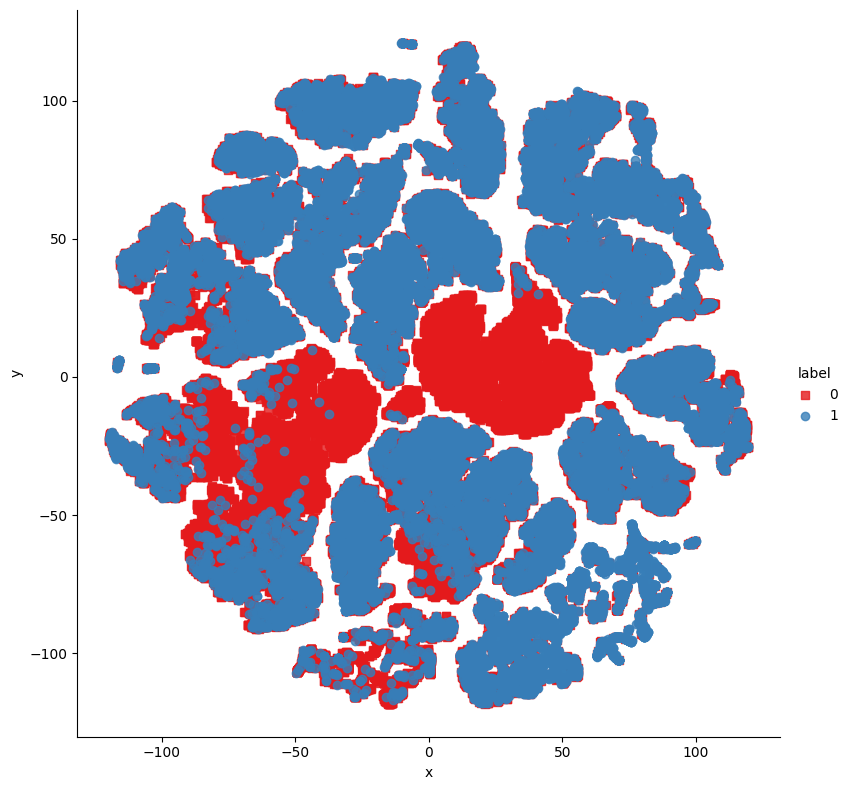

In [ ]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8,palette="Set1",markers=['s','o'])

In [ ]:
# prompt: genrate above lmplot in 3d

from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE

# Assuming X and y are defined from the previous code

tsne3d = TSNE(n_components=3, init='random', random_state=101, method='barnes_hut', n_iter=1000, verbose=2).fit_transform(X)

x_df = pd.DataFrame({'x': tsne3d[:, 0], 'y': tsne3d[:, 1], 'z': tsne3d[:, 2], 'label': y})

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_df['x'], x_df['y'], x_df['z'], c=x_df['label'], cmap='viridis')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 100000 samples in 0.043s...
[t-SNE] Computed neighbors for 100000 samples in 74.551s...
[t-SNE] Computed conditional probabilities for sample 1000 / 100000
[t-SNE] Computed conditional probabilities for sample 2000 / 100000
[t-SNE] Computed conditional probabilities for sample 3000 / 100000
[t-SNE] Computed conditional probabilities for sample 4000 / 100000
[t-SNE] Computed conditional probabilities for sample 5000 / 100000
[t-SNE] Computed conditional probabilities for sample 6000 / 100000
[t-SNE] Computed conditional probabilities for sample 7000 / 100000
[t-SNE] Computed conditional probabilities for sample 8000 / 100000
[t-SNE] Computed conditional probabilities for sample 9000 / 100000
[t-SNE] Computed conditional probabilities for sample 10000 / 100000
[t-SNE] Computed conditional probabilities for sample 11000 / 100000
[t-SNE] Computed conditional probabilities for sample 12000 / 100000
[t-SNE] Computed conditional probab

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report

from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[10062  2452]
 [ 2809  4677]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     12514
           1       0.66      0.62      0.64      7486

    accuracy                           0.74     20000
   macro avg       0.72      0.71      0.72     20000
weighted avg       0.73      0.74      0.74     20000



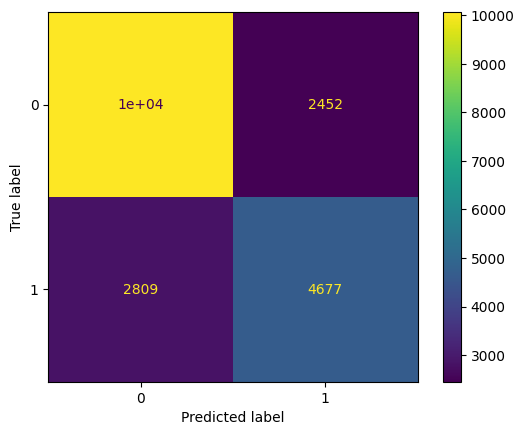

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Logistic Regression Accuracy: 0.6691
[[9649 2865]
 [3753 3733]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74     12514
           1       0.57      0.50      0.53      7486

    accuracy                           0.67     20000
   macro avg       0.64      0.63      0.64     20000
weighted avg       0.66      0.67      0.66     20000



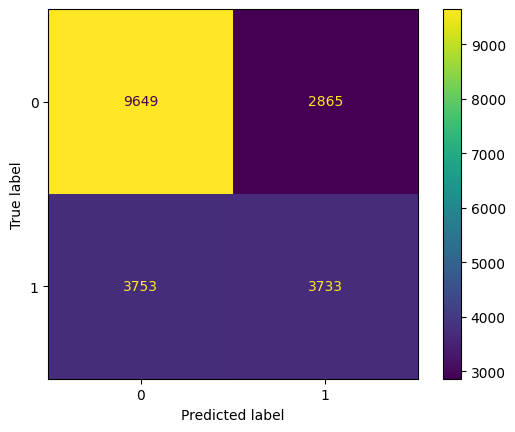

In [ ]:
# prompt: apply some other classifier

from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
lr = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


XGBoost Accuracy: 0.7421
[[9868 2646]
 [2512 4974]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.79     12514
           1       0.65      0.66      0.66      7486

    accuracy                           0.74     20000
   macro avg       0.72      0.73      0.73     20000
weighted avg       0.74      0.74      0.74     20000



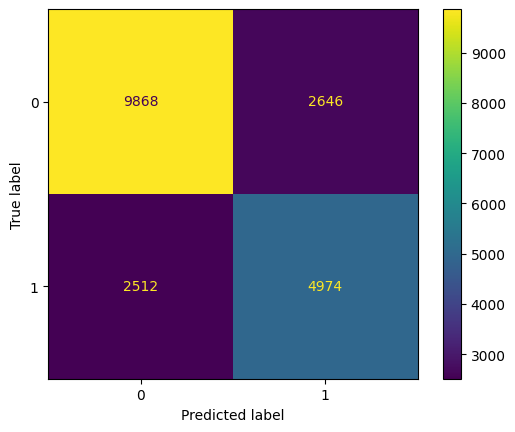

In [ ]:
# prompt: xgb classsifier

!pip install xgboost
from xgboost import XGBClassifier

# Initialize and train the XGBoost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("XGBoost Accuracy:", accuracy_xgb)

print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 29616, number of negative: 50384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2645
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370200 -> initscore=-0.531359
[LightGBM] [Info] Start training from score -0.531359
LightGBM Accuracy: 0.7374
[[9683 2831]
 [2421 5065]]
              precision    recall  f1-score   support

           0       0.80      0.77      0.79     12514
           1       0.64      0.68      0.66      7486

    accuracy                           0.74     20000
   macro avg       0.72      0.73      0.72     20000
weighted avg       0.74      0.74      0.74     20000



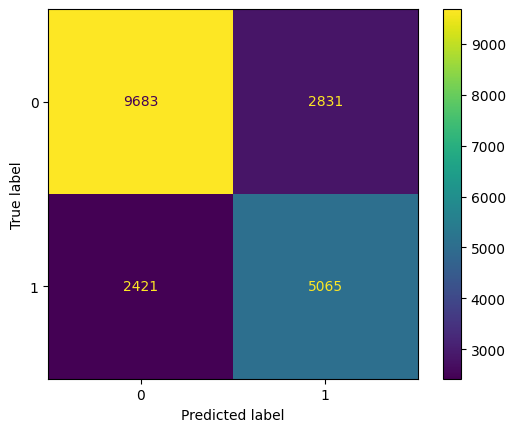

In [ ]:
# prompt: apply ligh bgm classsifier

!pip install lightgbm

import lightgbm as lgb

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# Define parameters for LightGBM
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

# Train the LightGBM model
model = lgb.train(params, train_data, num_boost_round=100, valid_sets=[test_data])

# Make predictions on the test set
y_pred_lgb = model.predict(X_test)

# Convert probabilities to binary predictions (e.g., threshold at 0.5)
y_pred_lgb_binary = [1 if prob >= 0.5 else 0 for prob in y_pred_lgb]


# Evaluate the model
accuracy_lgb = accuracy_score(y_test, y_pred_lgb_binary)
print("LightGBM Accuracy:", accuracy_lgb)

print(confusion_matrix(y_test, y_pred_lgb_binary))
print(classification_report(y_test, y_pred_lgb_binary))

cm = confusion_matrix(y_test, y_pred_lgb_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define the model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)), # Add dropout for regularization
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model with more epochs and potentially a larger batch size
model.fit(X_train, y_train, epochs=40, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred_nn))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_nn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
# prompt: apply lstm or gru s

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Tokenize the text data
max_words = 10000  # You can adjust this value
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(new_df['question1_lemmatized'].tolist() + new_df['question2_lemmatized'].tolist())

# Convert text to sequences of integers
q1_sequences = tokenizer.texts_to_sequences(new_df['question1_lemmatized'].tolist())
q2_sequences = tokenizer.texts_to_sequences(new_df['question2_lemmatized'].tolist())

# Pad sequences to have the same length
max_sequence_length = 50  # You can adjust this value
q1_data = pad_sequences(q1_sequences, maxlen=max_sequence_length)
q2_data = pad_sequences(q2_sequences, maxlen=max_sequence_length)

# Concatenate the question sequences
combined_data = np.concatenate((q1_data, q2_data), axis=1)


# Define the LSTM model
embedding_dim = 100  # You can adjust this value
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=combined_data.shape[1]))
model.add(LSTM(128))  # You can adjust the number of units
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(combined_data, new_df['is_duplicate'], test_size=0.2, random_state=42)

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Make predictions
y_pred_lstm = (model.predict(X_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred_lstm))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_lstm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
# prompt: add some more features to get the answer

def fetch_more_features(row):
    q1 = row['question1_lemmatized']
    q2 = row['question2_lemmatized']
    more_features = [0.0] * 2  # Initialize with two features

    # Feature 1: Jaccard similarity between question tokens
    q1_tokens = set(q1.split())
    q2_tokens = set(q2.split())
    if q1_tokens or q2_tokens:
        more_features[0] = len(q1_tokens.intersection(q2_tokens)) / len(q1_tokens.union(q2_tokens))
    else:
        more_features[0] = 0.0

    # Feature 2: Ratio of number of unique words in q1 to q2
    if len(q2_tokens) > 0:
      more_features[1] = len(q1_tokens) / len(q2_tokens)
    else:
      more_features[1] = 0.0

    return more_features


more_features = new_df.apply(fetch_more_features, axis=1)
new_df['jaccard_similarity'] = list(map(lambda x: x[0], more_features))
new_df['unique_word_ratio'] = list(map(lambda x: x[1], more_features))


# Redefine X with the new features
X = MinMaxScaler().fit_transform(new_df[['q1_len', 'q2_len',
                                          'q1_num_words', 'q2_num_words', 'word_common', 'word_total',
                                          'word_share', 'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min',
                                          'ctc_max', 'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
                                          'longest_substr_ratio', 'fuzz_ratio', 'fuzz_partial_ratio',
                                          'token_sort_ratio', 'token_set_ratio',
                                          'jaccard_similarity', 'unique_word_ratio']])
y = new_df['is_duplicate'].values

# Re-split the data with the new features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


# Retrain your models using the updated features and X_train, X_test, y_train, y_test
# ...


[LightGBM] [Info] Number of positive: 29616, number of negative: 50384
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005601 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3114
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370200 -> initscore=-0.531359
[LightGBM] [Info] Start training from score -0.531359
[LightGBM] [Info] Number of positive: 23693, number of negative: 40307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004369 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3221
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 24
[LightGBM] [Info] 

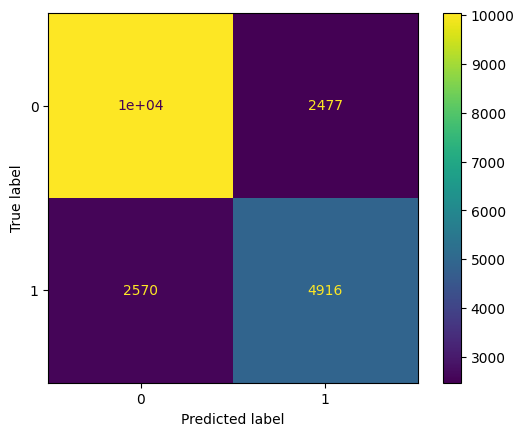

In [ ]:
# prompt: apply stacking

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Define your base models (e.g., RandomForest, XGBoost, LightGBM)
base_models = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier()),
    ('lgb', lgb.LGBMClassifier()),
]

# Define your meta-learner (e.g., Logistic Regression)
meta_learner = LogisticRegression()

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_learner)

# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)

# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", accuracy_stacking)

print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

cm = confusion_matrix(y_test, y_pred_stacking)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
pip install scikeras

[LightGBM] [Info] Number of positive: 29616, number of negative: 50384
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.022316 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3114
[LightGBM] [Info] Number of data points in the train set: 80000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370200 -> initscore=-0.531359
[LightGBM] [Info] Start training from score -0.531359
[LightGBM] [Info] Number of positive: 23693, number of negative: 40307
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3221
[LightGBM] [Info] Number of data points in the train set: 64000, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370203 -> initscore=-0.531346
[L

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Stacking Accuracy: 0.74595
[[10249  2265]
 [ 2816  4670]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80     12514
           1       0.67      0.62      0.65      7486

    accuracy                           0.75     20000
   macro avg       0.73      0.72      0.72     20000
weighted avg       0.74      0.75      0.74     20000



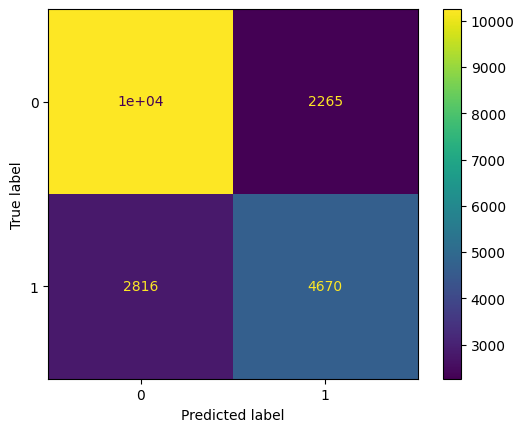

In [ ]:
# prompt: apply in the place of meta leraner the lstm

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from scikeras.wrappers import KerasClassifier



# Assuming X_train, X_test, y_train, y_test are defined from the previous code

# Define your base models (e.g., RandomForest, XGBoost, LightGBM)
base_models = [
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier()),
    ('lgb', lgb.LGBMClassifier()),
]


# Define your LSTM meta-learner
def create_lstm_model(input_shape):
  model = Sequential()
  model.add(LSTM(128, input_shape=input_shape))  # You can adjust the number of units
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

# Create an instance of the LSTM model
meta_learner = KerasClassifier(build_fn=create_lstm_model, input_shape=(X_train.shape[1], 1), epochs=10, batch_size=64, verbose=0)

# Create the stacking classifier
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_learner)


# Train the stacking classifier
stacking_classifier.fit(X_train, y_train)


# Make predictions
y_pred_stacking = stacking_classifier.predict(X_test)

# Evaluate the model
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print("Stacking Accuracy:", accuracy_stacking)

print(confusion_matrix(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

cm = confusion_matrix(y_test, y_pred_stacking)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
